<a href="https://colab.research.google.com/github/Alaqeelbasil/traffic-analysis/blob/main/Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Trainees - المتدربين/Week 4/4- Deep learning/1-Weekly Task/Datasets/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [14]:
df.drop(columns=['Did_Police_Officer_Attend_Scene_of_Accident','Light_Conditions','Pedestrian_Crossing-Physical_Facilities',
         'Pedestrian_Crossing-Human_Control','2nd_Road_Number','Road_Type',
         '1st_Road_Number','1st_Road_Class','Local_Authority_(Highway)','Local_Authority_(District)'],inplace=True)


KeyError: "['Did_Police_Officer_Attend_Scene_of_Accident', 'Light_Conditions', 'Pedestrian_Crossing-Physical_Facilities', 'Pedestrian_Crossing-Human_Control', '2nd_Road_Number', 'Road_Type', '1st_Road_Number', '1st_Road_Class', 'Local_Authority_(Highway)', 'Local_Authority_(District)'] not found in axis"

In [15]:
df.drop(columns=['2nd_Road_Class'], inplace=True)

In [39]:
df.drop(columns=['Date'], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location_Easting_OSGR    52000 non-null  float64
 1   Location_Northing_OSGR   52000 non-null  float64
 2   Longitude                52000 non-null  float64
 3   Latitude                 52000 non-null  float64
 4   Police_Force             52000 non-null  int64  
 5   Accident_Severity        51678 non-null  float64
 6   Number_of_Vehicles       52000 non-null  int64  
 7   Number_of_Casualties     50959 non-null  float64
 8   Date                     52000 non-null  object 
 9   Day_of_Week              52000 non-null  int64  
 10  Speed_limit              52000 non-null  int64  
 11  Weather_Conditions       52000 non-null  object 
 12  Road_Surface_Conditions  52000 non-null  object 
 13  Urban_or_Rural_Area      51912 non-null  float64
 14  Year                  

In [21]:
df['Road_Surface_Conditions'].value_counts()

,count
Road_Surface_Conditions,
Dry,35727
Wet/Damp,14618
Frost/Ice,1108
Snow,384
Normal,88
Flood (Over 3cm of water),75


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [22]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [35]:
df['Urban_or_Rural_Area'].value_counts()
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0], inplace=True)

In [29]:
df['Accident_Severity'].value_counts()
df['Accident_Severity'].fillna(df['Accident_Severity'].mode()[0], inplace=True)

In [33]:
df['Number_of_Casualties'].value_counts()
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mode()[0], inplace=True)

In [36]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location_Easting_OSGR    52000 non-null  float64
 1   Location_Northing_OSGR   52000 non-null  float64
 2   Longitude                52000 non-null  float64
 3   Latitude                 52000 non-null  float64
 4   Police_Force             52000 non-null  int64  
 5   Accident_Severity        52000 non-null  float64
 6   Number_of_Vehicles       52000 non-null  int64  
 7   Number_of_Casualties     52000 non-null  float64
 8   Day_of_Week              52000 non-null  int64  
 9   Speed_limit              52000 non-null  int64  
 10  Weather_Conditions       52000 non-null  object 
 11  Road_Surface_Conditions  52000 non-null  object 
 12  Urban_or_Rural_Area      52000 non-null  float64
 13  Year                     52000 non-null  int64  
dtypes: float64(7), int64(5

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le_en = LabelEncoder()
df['Weather_Conditions'] = le_en.fit_transform(df['Weather_Conditions'])
df['Road_Surface_Conditions'] = le_en.fit_transform(df['Road_Surface_Conditions'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location_Easting_OSGR    52000 non-null  float64
 1   Location_Northing_OSGR   52000 non-null  float64
 2   Longitude                52000 non-null  float64
 3   Latitude                 52000 non-null  float64
 4   Police_Force             52000 non-null  int64  
 5   Accident_Severity        52000 non-null  float64
 6   Number_of_Vehicles       52000 non-null  int64  
 7   Number_of_Casualties     52000 non-null  float64
 8   Day_of_Week              52000 non-null  int64  
 9   Speed_limit              52000 non-null  int64  
 10  Weather_Conditions       52000 non-null  int64  
 11  Road_Surface_Conditions  52000 non-null  int64  
 12  Urban_or_Rural_Area      52000 non-null  float64
 13  Year                     52000 non-null  int64  
dtypes: float64(7), int64(7

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [58]:
df['Number_of_Vehicles'].value_counts()

,count
Number_of_Vehicles,
2,30864
1,15732
3,4235
4,856
5,201
6,64
7,23
8,14
10,5


In [60]:
selected_features= ['Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Speed_limit','Weather_Conditions','Road_Surface_Conditions']
#beacuse it is releatd to accdident cause

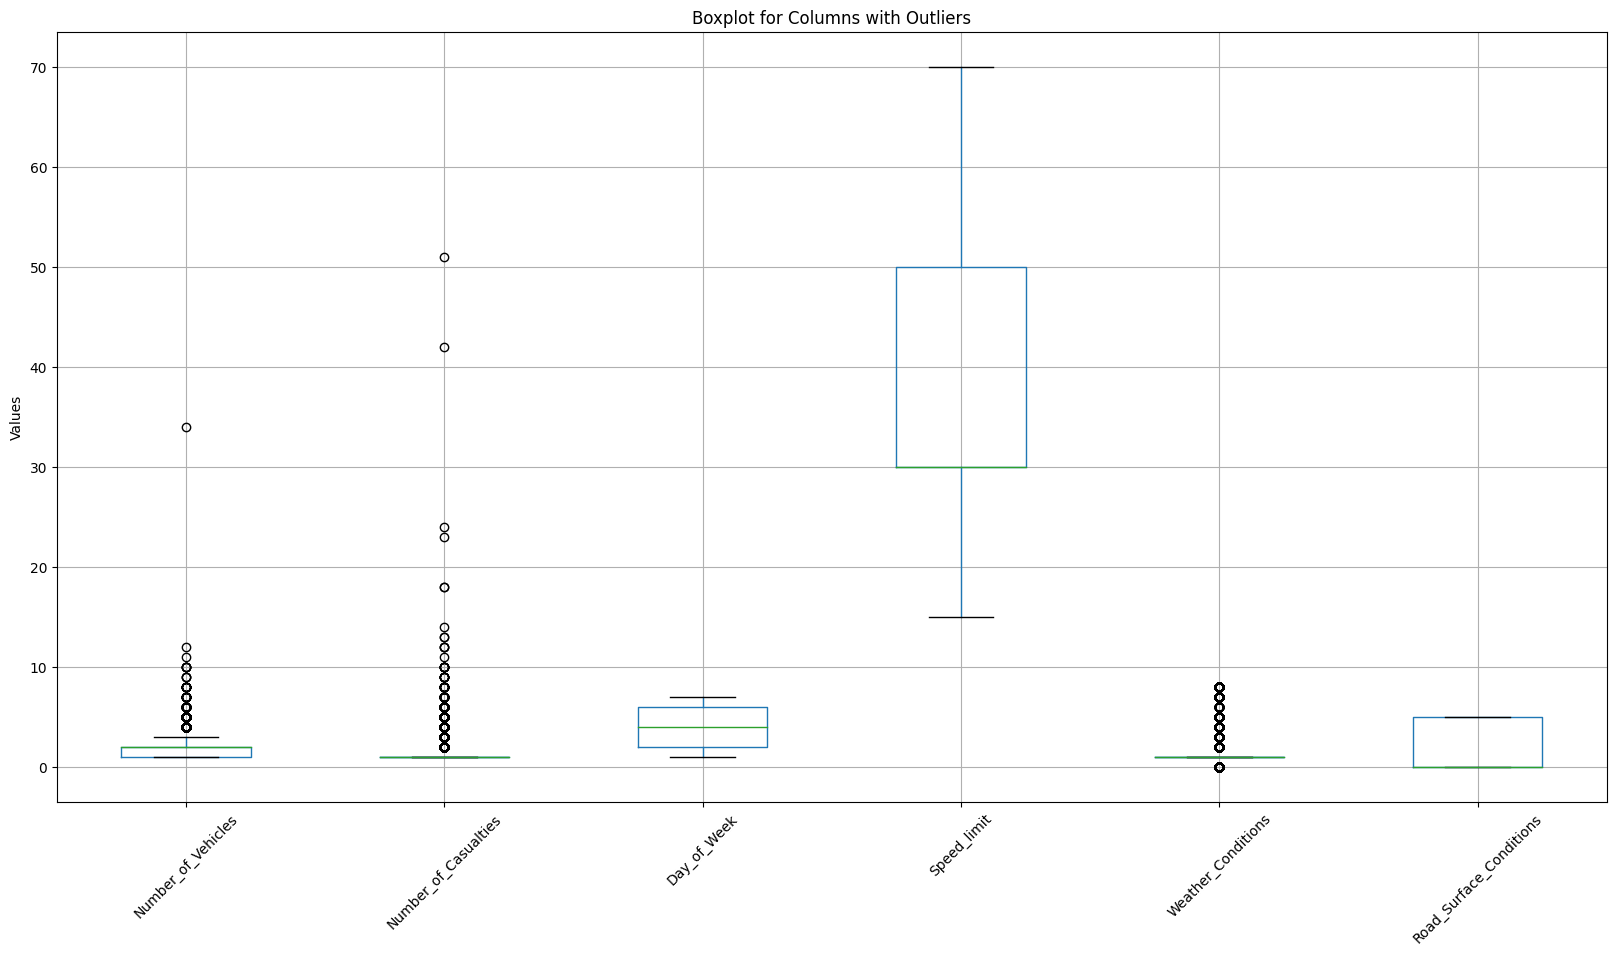

In [150]:
z =['Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Speed_limit','Weather_Conditions','Road_Surface_Conditions']

plt.figure(figsize=(20, 10))
df[z].boxplot()

plt.title('Boxplot for Columns with Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [152]:
for col in z:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1-1.5*IQR
  upper = Q3=1.5 * IQR
  df[col] = df[col].clip(lower, upper)
  # this for loop will reomve outliers

In [55]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 1.26429622, -1.21412154,  1.21902956, ..., -0.21559637,
         1.33673442, -0.13361915],
       [ 0.72102389, -0.69838299,  0.71276881, ..., -0.66081345,
        -0.74796671,  0.19894179],
       [-1.32295022, -0.81018211, -1.29038733, ..., -0.66081345,
        -0.74796671, -1.46386292],
       ...,
       [ 1.05380054, -0.91479239,  1.0293148 , ...,  1.56527194,
        -0.74796671,  0.53150274],
       [-0.0585041 ,  0.21156525, -0.04153162, ...,  1.56527194,
        -0.74796671,  0.53150274],
       [ 0.15167616, -0.70916627,  0.15382882, ..., -0.66081345,
         1.33673442,  0.19894179]])

In [116]:
from sklearn.decomposition import PCA


In [155]:
pca =PCA(n_components=0.90)
dfpca = pca.fit_transform(scaled_df)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

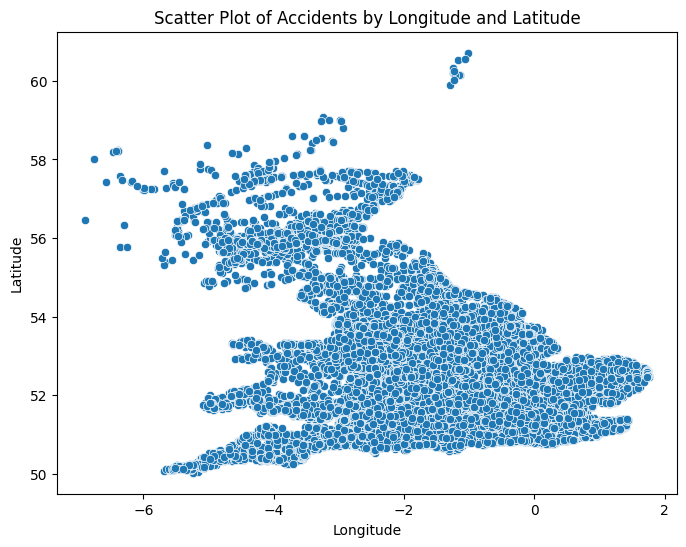

In [126]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Longitude', y='Latitude', data=df,)
plt.title('Scatter Plot of Accidents by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [63]:
from sklearn.cluster import KMeans

In [156]:
inertia = []
K = range(1,14)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfpca)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

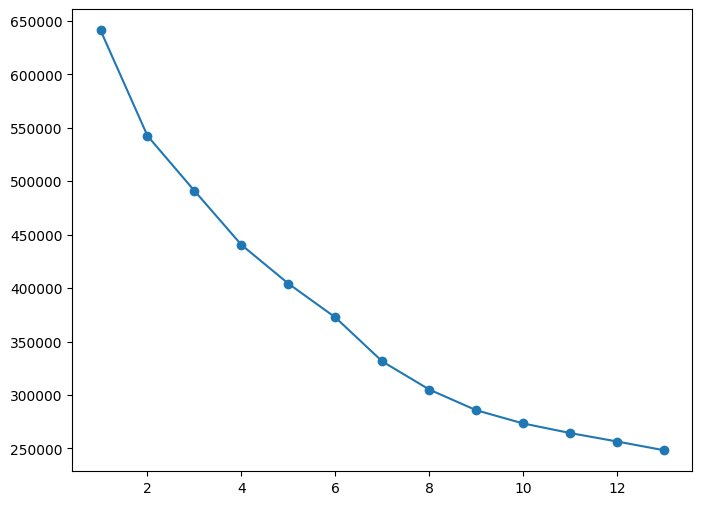

In [157]:
plt.figure(figsize=(8,6))
plt.plot(range(1,14),inertia,marker='o')

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
#from this plot cluster will be 5

In [163]:
knn=  KMeans(n_clusters=5, init='k-means++', random_state=42).fit(dfpca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [121]:
labels = knn.labels_

In [122]:
from sklearn.metrics import silhouette_score

In [159]:
sil = silhouette_score(dfpca,labels)

print(f'Silhouette Score: {sil}')

Silhouette Score: 0.1026880915920919


## Plot the data points with their predicted cluster center

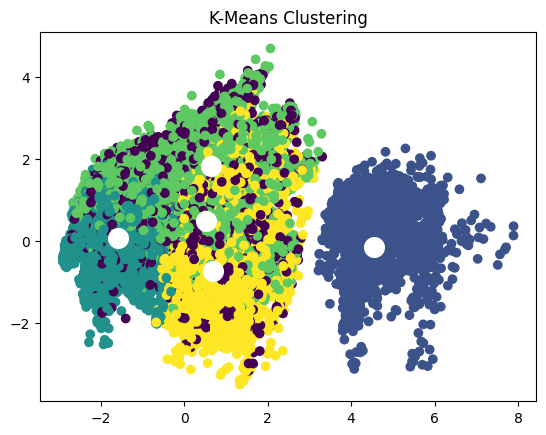

In [165]:
plt.scatter(dfpca[:, 0], dfpca[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(knn.cluster_centers_[:, 0], knn.cluster_centers_[:, 1], s=200, c='white', label='Centroids')
plt.title('K-Means Clustering')
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

In [ ]:
# I choce data which are related to accdint

# with elbow grapgh the strong change started from 5 so i choce it

# I did silhouette_score because it is unsupervised data
# it show how close are clusters

#DbScan